## Neural Network w/ numpy

In [28]:
import numpy as np
class NeuralNet():
    def __init__(self, input_n, hidden_n, output_n, learning_rate):
        self.W_input_hidden = np.random.randn(input_n, hidden_n) 
        self.b_input_hidden = np.zeros((1,hidden_n))
        self.W_hidden_output = np.random.randn(hidden_n, output_n) 
        self.b_hidden_output = np.zeros((1,output_n))
        self.learning_rate = learning_rate

    def relu(self, x):
        return np.maximum(0,x)

    def relu_gradient(self, x):
        return (x>0).astype(float)

    def forward(self,x):
        self.z1 = x @ self.W_input_hidden + self.b_input_hidden
        self.a1 = self.relu(self.z1)
        self.yhat = self.a1 @ self.W_hidden_output + self.b_hidden_output
        return self.yhat

    def mse_loss(self, yhat, y):
        return np.mean((yhat-y)**2) / 2

    def backprop(self, X, y):
        m = X.shape[0]

        delta2 = (1/m) * (self.yhat-y)
        dW_hidden_output = self.a1.T @ delta2
        delta1 = (delta2 @ self.W_hidden_output.T) * self.relu_gradient(self.z1)
        dW_input_hidden = X.T @ delta1 
        db_hidden_output = np.mean(delta2, axis=0, keepdims=True)
        db_input_hidden = np.mean(delta1, axis=0, keepdims=True)

        self.W_hidden_output = self.W_hidden_output - self.learning_rate * dW_hidden_output
        self.b_hidden_output = self.b_hidden_output - self.learning_rate * db_hidden_output
        self.W_input_hidden = self.W_input_hidden - self.learning_rate * dW_input_hidden
        self.b_input_hidden = self.b_input_hidden - self.learning_rate * db_input_hidden

    def fit(self, X, y, epochs):
        tenth = epochs//10
        for e in range(epochs):
            yhat = self.forward(X)
            loss = self.mse_loss(yhat, y)
            self.backprop(X,y)
            if(e%tenth==0):
                print(f"Epoch {e} loss: {loss}")


In [107]:
n_instances = 10000
epochs = 1000
spread = 10

rng = np.random.default_rng()
x1 = rng.random(n_instances) * spread
x2 = rng.random(n_instances) * spread
y = (x1+x2).reshape(-1,1)
X = np.column_stack([x1,x2])

NN = NeuralNet(2, 2, 1, .01)
NN.fit(X, y, epochs)

print("1+1 is", NN.forward([1,1])[0][0])

# Note: I've noticed that the 2-2-1 configuration sometimes gets stuck in local minima when epoch 0 loss > 57
# Loss gets to 57-58 but not lower. Only happens sometimes when the first epoch loss is above 57 though
# Seems like the network cant recover if the first guess at weights is really bad 
# Overall converges to good weights about 80% of the time though

Epoch 0 loss: 59.36308702168403
Epoch 100 loss: 0.011354051190541786
Epoch 200 loss: 6.885693177483159e-06
Epoch 300 loss: 1.5873150714416444e-08
Epoch 400 loss: 1.519222541662874e-08
Epoch 500 loss: 1.4553636483476696e-08
Epoch 600 loss: 1.3954725583081467e-08
Epoch 700 loss: 1.339302649467218e-08
Epoch 800 loss: 1.2866226288291735e-08
Epoch 900 loss: 1.2372155796408008e-08
1+1 is 2.0002064034270606


**The math:**

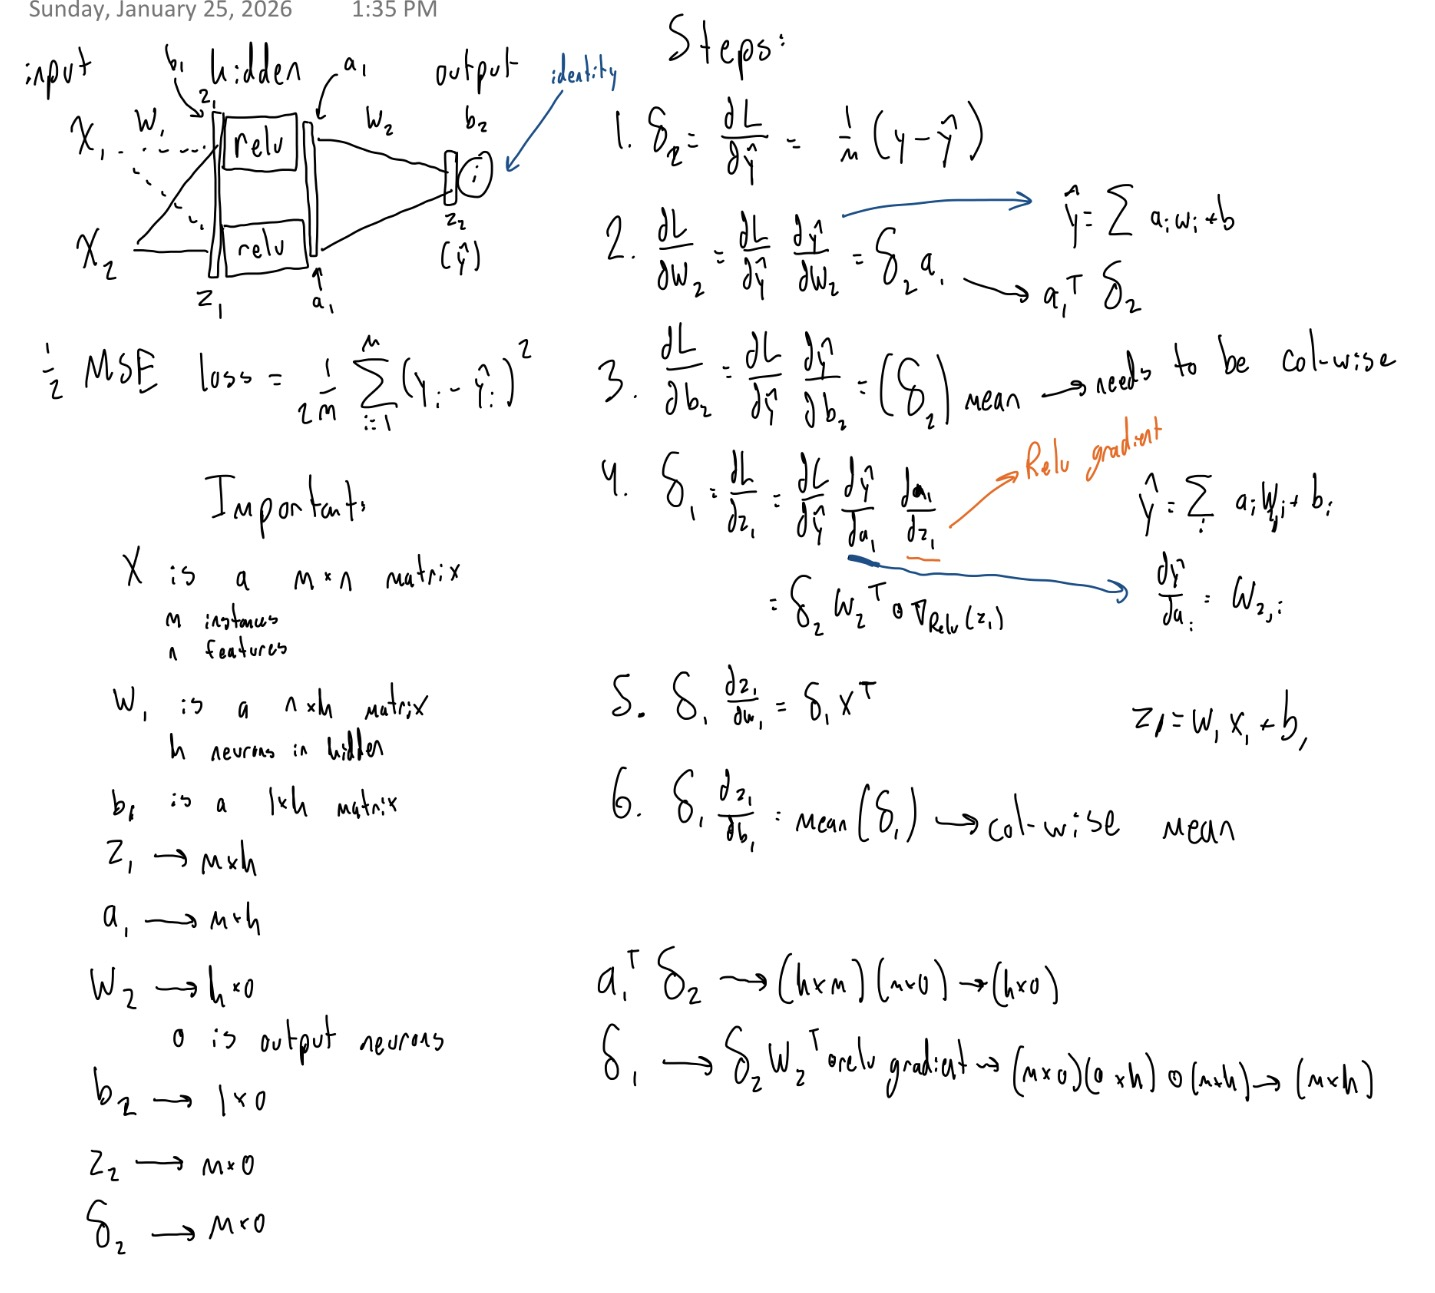